Work with the deepstack object detection API (Yolo-v3). Note that by default, the minimum confidence for detected objects is 0.45

In [1]:
import deepstack.core as ds
from PIL import Image
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IP_ADDRESS = 'localhost'
PORT = '80'
API_KEY = ""
TIMEOUT = 20 # Default is 10

## Object detection

In [3]:
dsobject = ds.DeepstackObject(IP_ADDRESS, PORT, API_KEY, TIMEOUT)

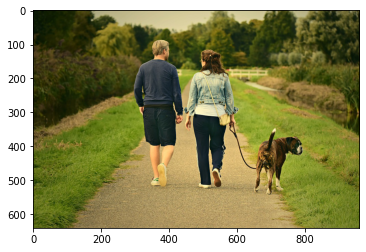

In [4]:
image_path = 'tests/images/test-image3.jpg'

plt.imshow(Image.open(image_path));

Perform object detection - can be slow

In [5]:
%%time
try:
    with open(image_path, 'rb') as image_bytes:
        dsobject.detect(image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 8.26 ms, sys: 4.79 ms, total: 13 ms
Wall time: 701 ms


Access the predictions

In [6]:
dsobject.predictions

[{'confidence': 0.43233895,
  'label': 'handbag',
  'y_min': 206,
  'x_min': 502,
  'y_max': 343,
  'x_max': 599},
 {'confidence': 0.88998777,
  'label': 'person',
  'y_min': 115,
  'x_min': 443,
  'y_max': 521,
  'x_max': 605},
 {'confidence': 0.90152204,
  'label': 'dog',
  'y_min': 344,
  'x_min': 651,
  'y_max': 540,
  'x_max': 795},
 {'confidence': 0.95077235,
  'label': 'person',
  'y_min': 82,
  'x_min': 296,
  'y_max': 522,
  'x_max': 442}]

In [7]:
len(dsobject.predictions)

4

## Helper functions
The package provides helper functions for extracting info out of deepstack predictions

Get the set objects

In [8]:
ds.get_objects(dsobject.predictions)

['dog', 'handbag', 'person']

Get a summary of the number of occurances of objects

In [9]:
summary = ds.get_objects_summary(dsobject.predictions)
summary

{'dog': 1, 'handbag': 1, 'person': 2}

Get a list of confidences for a single object type, e.g. `person`

In [10]:
person_confidences = ds.get_object_confidences(dsobject.predictions, 'person')
person_confidences

[0.88998777, 0.95077235]

Get the list of confidences above some threshold value, useful for counting

In [11]:
CONFIDENCE_THRESHOLD = 0.9
len(ds.get_confidences_above_threshold(person_confidences, CONFIDENCE_THRESHOLD))

1

## Custom model
I have mounted a custom model, run with:
```
docker run -v /Users/robin/Data/pytorch-models:/modelstore/detection -p 80:5000 deepquestai/deepstack:latest
```

In [12]:
mask_model = ds.DeepstackObject(IP_ADDRESS, PORT, API_KEY, TIMEOUT, custom_model='mask')

In [13]:
mask_model

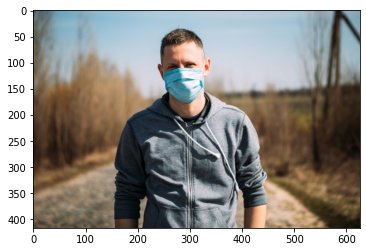

In [14]:
image_path = 'tests/images/masked.jpg'

plt.imshow(Image.open(image_path));

In [17]:
%%time
try:
    with open(image_path, 'rb') as image_bytes:
        mask_model.detect(image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 5 ms, sys: 2.83 ms, total: 7.83 ms
Wall time: 548 ms


In [18]:
mask_model.predictions

[{'confidence': 0.94608647,
  'label': 'mask',
  'y_min': 111,
  'x_min': 248,
  'y_max': 177,
  'x_max': 332}]